# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import os.path
import urllib.request
import zipfile

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'
filename = "traffic-signs-data.zip"

if not os.path.isfile(filename):
    print("File {} not found. Downloading now...".format(filename))
    request.urlretrieve(url,filename)

if os.path.isfile(filename):
    z = zipfile.ZipFile(filename)
    
    for pickle_filename in ['train.p','valid.p','test.p']:
        if not os.path.isfile(pickle_filename):
            z.extract(pickle_filename)

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file  = 'train.p'
validation_file= 'valid.p'
testing_file   = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

### Displaying a few random images
A very small subset of 64 images is displayed below. Every time the cell below is executed, a large fraction of the images appears too dark to be recognized even by a human. Some images are pixelated, overexposed or blurred making their classification challenging. Since the entire set cannot be exmined in this way, histogram analysis is performed after this step to detect over and under-exposure across the training dataset.

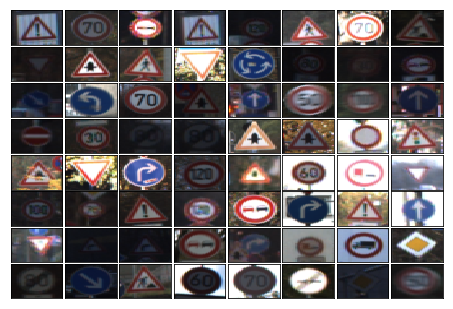

In [5]:
### Plot 64 random training images.
import numpy.random as rnd
import matplotlib.gridspec as gridspec

def plot_random_samples(images):
    sample_ids = rnd.randint(0,len(images),64)
    samples = images[sample_ids]

    gs = gridspec.GridSpec(8,8, top=1., bottom=0., right=1., left=0., hspace=0.05,wspace=0.05)
    for index,g in enumerate(gs):
        ax = plt.subplot(g)
        ax.imshow(samples[index])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('auto')
    plt.show()

plot_random_samples(X_train)

### Checking for under or over exposure.
We plot the histogram of all images in the training set. The pixel intensity of each image is averaged over all three channels and a histogram is then calculated over all images in the set. The histogram has a large hump between intensity levels 0 and 50 and a tall spike around intensity level 255. This suggest large number of very-dark pixels or very bright pixels.

To get a clearer picture of the overall brightness, a cumulative histogram is plotted further below. As described [here](https://luminous-landscape.com/understanding-histograms/), if the intensity levels are divided into 5 bins, **very dark**, **dark**, **medium**, **light** and **very light**, close to 60% of pixels fall in the **very dark**, **dark** categories. Compared to this only about 10% of pixels fall in the **light** and **very light** regions. This suggests widespread underexposure and histogram equalization may improve training performance.

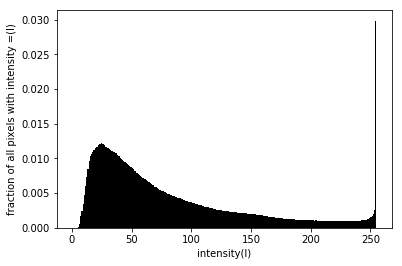

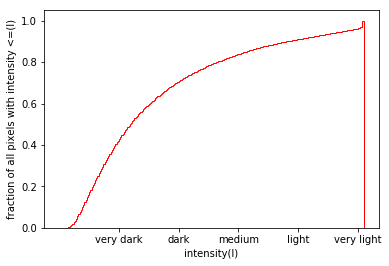

In [6]:
## Plot the histogrm of all images.
## The histogram is computed by averaging pixel intensities over all three channels.
def hist_img_data(X):
    plt.hist(np.mean(X,axis=3).flatten(),bins=range(256),color='k',normed=True)
    plt.xlabel('intensity(I)')
    plt.ylabel('fraction of all pixels with intensity =(I)')
    plt.show()

    plt.hist(np.mean(X,axis=3).flatten(),bins=range(256),color='r',normed=True,cumulative=True, histtype='step')
    plt.xlabel('intensity(I)')
    plt.xticks([50,100,150,200,250],['very dark', 'dark', 'medium','light','very light'])
    plt.ylabel('fraction of all pixels with intensity <=(I)')
    plt.show()

hist_img_data(X_train)

### Checking class labels for skew
Histogram of class labels for training, validation and test sets are plotted below. A very large skew is in the number of samples is evident from the plots. For example, in the training set, a few labels have close to 2000 samples while many have a low sample count in the vicinity of 200-400. Similar skew is present in the other two datasets.

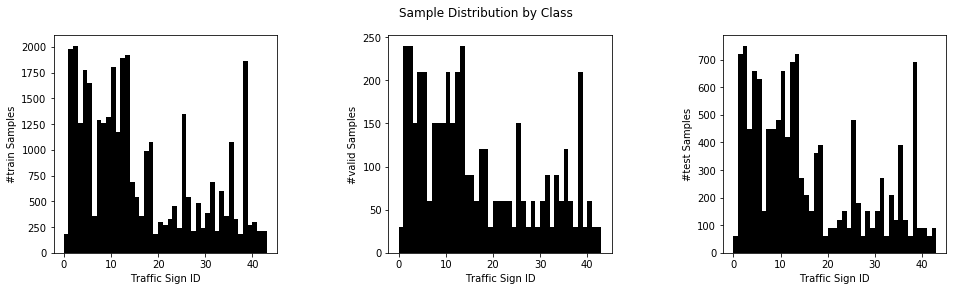

In [7]:
## Plot frequency of each type of traffic sign in the training data.
def hist_labels(datasets=None,ylabels=None):
    fig = plt.figure(figsize=(16,4))
    

    for i in range(len(datasets)):
        axis = fig.add_subplot(1,3,i+1)
        axis.hist(datasets[i],bins=range(n_classes+1),color='k')
        plt.ylabel('#{} Samples'.format(ylabels[i]))  
        plt.xlabel('Traffic Sign ID')

    fig.subplots_adjust(wspace=0.5)
    plt.suptitle("Sample Distribution by Class")    
    plt.show()
    
hist_labels(datasets = [y_train,y_valid, y_test],ylabels  = ['train','valid','test'])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Histogram equalization
Histogram equalization is applied to all three datasets. 

In [8]:
import cv2
def hist_equalize(X):
    for i in range(X.shape[0]):
        img_rgb = X[i,:,:,:]
        img_yuv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2YUV)
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        X[i,:,:,:] = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2RGB)
    return X

X_train = hist_equalize(X_train)
X_valid = hist_equalize(X_valid)
X_test  = hist_equalize(X_test)

The corrected histogram for training data is shown below. Although it does not look very 'natural', becasue pixel intensities have been artifically smeared out, random images from the dataset look clearer to the naked eye.

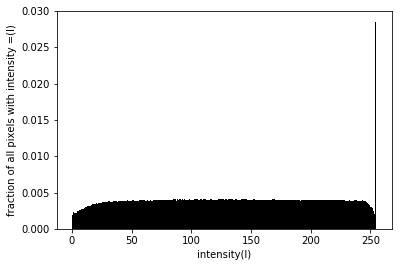

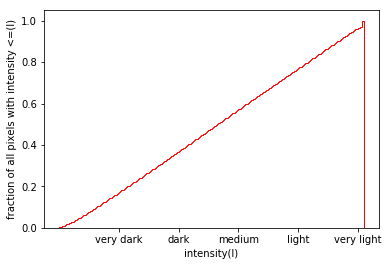

In [9]:
hist_img_data(X_train)

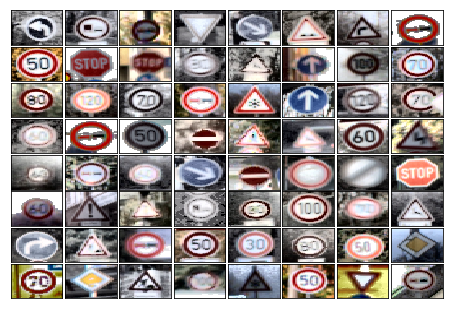

In [10]:
plot_random_samples(X_train)

#### Augmenting the training dataset.
Because of the large skew in the training dataset, it is inevitable that accuracy will be affected. We generate more data for every class by applying simple, random affine transformations to every image in the training dataset. The number of copies generated per image depends on the number of existing samples in its class. This makes the number of samples in every class roughly of the same order.

In [11]:
import cv2

MIN_ROTATION = -10.0
MAX_ROTATION =  10.0

MIN_OFFSET = -2
MAX_OFFSET = 2

MIN_PIXEL_POSITION = 12
MAX_PIXEL_POSITION = 20



def apply_random_affine(img,n):
    
    # Allocate an array for holding all transformed images.
    output = np.zeros(shape=[n,*img.shape],dtype=img.dtype)
    
    # Generate random centers and angles for rotation.
    angles = (MAX_ROTATION-MIN_ROTATION) * np.random.random(n) + MIN_ROTATION
    centers= np.random.randint(MIN_PIXEL_POSITION,MAX_PIXEL_POSITION+1,size=[n,2])
    
    # Generate random offsets for translation.
    offsets = np.random.randint(MIN_OFFSET,MAX_OFFSET+1,size=[n,2])
    
    # Generate transformed copies of input image.
    for i in range(n):
        M_rotate = cv2.getRotationMatrix2D(tuple(centers[i,:]),angles[i],1)
        tmp = cv2.warpAffine(img,M_rotate,None)
        
        M_translate = np.float32([[1, 0, offsets[i,0]], [0, 1, offsets[i,1]]])
        output[i] = cv2.warpAffine(tmp,M_translate,img.shape[:2])
    
    return output
        

def add_variants(X,y,n_copies):
    
    #Initialize output dataset with original data.
    X_out = np.copy(X)
    y_out = np.copy(y)
    
    # Generate copies for every image in the original dataset.
    # Append these copies and corresponding labels to output dataset.
    m = len(X)
    for i in range(m):
        variant_data = apply_random_affine(X[i],n_copies)
        X_out = np.vstack((X_out,variant_data))

        variant_labels = np.array([y[0]]*n_copies,dtype=y.dtype)
        y_out = np.concatenate((y_out,variant_labels))
    
    return (X_out,y_out)

            

    
def augment_data(X,y,MIN_EXAMPLE_COUNT = 1000):
    # Get sample count for every class label.
    # For np.histogram to work correctly with 0-based labels,
    # the number fo bins has to be 1 more than the number of
    # classes.
    counts, labels = np.histogram(y,bins=range(n_classes+1))
    
    
    # Initilize empty output arrays. These will be filled with
    # original and transformed samples.
    data_shape = X.shape[1:]
    data_type  = X.dtype
    
    label_shape = y.shape[1:]
    label_type  = y.dtype
    
    X_out = np.empty(shape=[0,*data_shape],dtype=data_type)
    y_out = np.empty(shape=[0,*label_shape],dtype=label_type)
    
    
    # For every class, generate an appropriate number of synthetic samples.
    # 
    # np.histogram() above will generate one extra label
    # that we don't iterate over.
    
    for label in labels[:-1]:
        X_label = X[y==label]
        y_label = y[y==label]
        
        n_orig = len(y_label)
        
        if(counts[label] < 0.5 * MIN_EXAMPLE_COUNT):
            n_copies = MIN_EXAMPLE_COUNT//counts[label]
            X_label,y_label = add_variants(X_label,y_label,n_copies)
            
        n_total = len(y_label)
        
        X_out = np.concatenate((X_out,X_label))
        y_out = np.concatenate((y_out,y_label))
            
        print("Class label {}, original sample count {}, updated sample count {}"\
              .format(label,n_orig,n_total))
        
    return (X_out, y_out)

In [12]:
X_train, y_train = augment_data(X_train,y_train,MIN_EXAMPLE_COUNT=5000)
# X_valid, y_valid = augment_data(X_valid,y_valid,MIN_EXAMPLE_COUNT=200)

Class label 0, original sample count 180, updated sample count 5040
Class label 1, original sample count 1980, updated sample count 5940
Class label 2, original sample count 2010, updated sample count 6030
Class label 3, original sample count 1260, updated sample count 5040
Class label 4, original sample count 1770, updated sample count 5310
Class label 5, original sample count 1650, updated sample count 6600
Class label 6, original sample count 360, updated sample count 5040
Class label 7, original sample count 1290, updated sample count 5160
Class label 8, original sample count 1260, updated sample count 5040
Class label 9, original sample count 1320, updated sample count 5280
Class label 10, original sample count 1800, updated sample count 5400
Class label 11, original sample count 1170, updated sample count 5850
Class label 12, original sample count 1890, updated sample count 5670
Class label 13, original sample count 1920, updated sample count 5760
Class label 14, original sample 

We can plot some random samples again to see the effects of data augmentation.

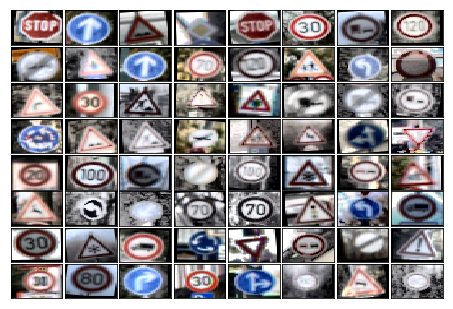

In [13]:
plot_random_samples(X_train)

#### Normalizing pixel intensities
In the original datasets pixel values are in the range [0,255]. The values are normalized the subtracting channel-wise mean intensities and dividing by the corresponding pixel standard deviations as described in [CS231n lecture notes](http://cs231n.github.io/neural-networks-2/). The mean and standard deviation are calculated from training data and used to normalize all three datasets.

In [14]:
import numpy as np

### Calculate per-channel pixel mean and std deviation.
### An alternative would be to use per channel mean image.


pixel_means   = np.mean(X_train,axis=(0,1,2),dtype=np.float32)
pixel_stddevs = np.std(X_train,axis=(0,1,2),dtype=np.float32)

X_train =  X_train - pixel_means
X_train =  X_train / (pixel_stddevs + 1e-6) #avoid division by 0

X_valid = X_valid - pixel_means
X_valid = X_valid / (pixel_stddevs + 1e-6)  #avoid division by 0


X_test = X_test - pixel_means
X_test = X_test / (pixel_stddevs + 1e-6)    #avoid division by 0


### Model Architecture

In [15]:
### Wrappers for frequenty used layers.
### Code shamelessly imitated from 
### https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/convolutional_network.py

import tensorflow as tf
import tensorflow.contrib.layers as layers

def conv(X,W,b,stride=1):
    out = tf.nn.conv2d(X,W,[1,stride,stride,1],padding='VALID')
    out = tf.nn.bias_add(out,b)
    return tf.nn.relu(out)


def maxpool(X,k,s):
    return tf.nn.max_pool(X,ksize=[1,k,k,1],strides=[1,s,s,1],padding='VALID')

def flatten(X):
    return layers.flatten(X)

def dense(x,W,B,squash=True):
    out = tf.matmul(x,W)
    out = tf.add(out,B)
    
    if squash == True:
        out = tf.nn.relu(out)
    return out
    
    

In [16]:
# Define hyper-parameters.
epochs = 400
batch_size = 128
learning_rate = 0.001
dropout_probability = 0.20

In [17]:
### Build LeNet like convolution network.

# Mean and std. deviation for randomly initilized parameters.
mu = 0
sigma = 0.1

# Define input plaeholders.
X = tf.placeholder(tf.float32,[None,32,32,3])
y = tf.placeholder(tf.uint8,[None])

# Define parameters (weights and biases)
params = {
    # 5x5 convolution, input depth 3, output depth 6.
    'conv1':{
        'weights':tf.Variable(tf.truncated_normal([5,5,3,6],mu,sigma)),
        'biases' :tf.Variable(tf.zeros([6])),
        'stride':1
    },
    
    # 2x2 pooling
    'pool1':{
        'kernel_sz':2,
        'stride':2
    },
    
    # 5x5 convolution, input depth 6, output depth 16.
    'conv2':{
        'weights':tf.Variable(tf.truncated_normal([5,5,6,16],mu,sigma)),
        'biases':tf.Variable(tf.zeros([16])),
        'stride':1
    },
    
    # 2x2 pooling
    'pool2':{
        'kernel_sz':2,
        'stride':2
    },
    
    # 400 -> 120 dense layer
    'dense1':{
        'weights':tf.Variable(tf.truncated_normal([400,120],mu,sigma)),
        'biases':tf.Variable(tf.zeros([120]))
    },
    
    # 120 -> 84
    'dense2':{
        'weights':tf.Variable(tf.truncated_normal([120,84],mu,sigma)),
        'biases':tf.zeros(([84]))
    },
    
    # 84 -> 43
    'dense3':{
        'weights':tf.Variable(tf.truncated_normal([84,43],mu,sigma)),
        'biases':tf.zeros(([43]))
    }
    
    
    
}

conv1_out = conv(X,params['conv1']['weights'],params['conv1']['biases'],params['conv1']['stride'])
pool1_out = maxpool(conv1_out,params['pool1']['kernel_sz'],params['pool1']['stride'])


conv2_out = conv(pool1_out,params['conv2']['weights'],params['conv2']['biases'],params['conv2']['stride'])
pool2_out = maxpool(conv2_out,params['pool2']['kernel_sz'],params['pool2']['stride'])


flat_out  = flatten(pool2_out)

fc1_out   = dense(flat_out,params['dense1']['weights'],params['dense1']['biases'])
if(dropout_probability > 0.0):
    fc1_out = tf.nn.dropout(fc1_out,1-dropout_probability)
    
fc2_out   = dense(fc1_out,params['dense2']['weights'],params['dense2']['biases'])
if(dropout_probability > 0.0):
    fc2_out = tf.nn.dropout(fc2_out,1-dropout_probability)
    
fc3_out   = dense(fc2_out,params['dense3']['weights'],params['dense3']['biases'],squash=False)
logits = fc3_out


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
one_hot_y = tf.one_hot(y,n_classes,on_value=1,off_value=0)

# Define cost function (minimization objective) and minimization algorithm.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits,one_hot_y)
training_loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate)
optimization = optimizer.minimize(training_loss)

# Define accuracy.
correct_predictions = tf.equal(tf.arg_max(logits,1),tf.arg_max(one_hot_y,1))
accuracy_calculation = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))


In [19]:
# Define evalution function.
def evaluate(sess,X_data,y_data):
    num_examples = X_data.shape[0]
    
    net_accuracy = 0.0;
    n_batches = num_examples // batch_size
    for offset in range(0,num_examples,batch_size):
        X_batch = X_data[offset:offset+batch_size]
        y_batch = y_data[offset:offset+batch_size]
        
        batch_accuracy = sess.run(accuracy_calculation,feed_dict={X:X_batch,y:y_batch})
        
        net_accuracy += batch_accuracy
    
    return net_accuracy / n_batches

In [20]:
# Define training function
from sklearn.utils import shuffle

def train(sess):
    sess.run(tf.global_variables_initializer())
    
    for e in range(epochs):
        global X_train, y_train 
        X_train, y_train = shuffle(X_train,y_train)
        for offset in range(0,n_train,batch_size):
            X_batch = X_train[offset:offset+batch_size]
            y_batch = y_train[offset:offset+batch_size]

            sess.run(optimization,feed_dict={X:X_batch,y:y_batch})

        if (e+1) % 10 == 0:
            train_accuracy = evaluate(sess,X_train,y_train)
            valid_accuracy = evaluate(sess,X_valid,y_valid)
            print("Epochs {}, training accuracy {:.3f}, validation accuracy {:.3f}"\
                .format(e+1,train_accuracy,valid_accuracy))
    print("Test accuracy {:.3f}".format(evaluate(sess,X_test,y_test)))
    

In [ ]:
# Run all computation.
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as s:
    print("Training started!")
    train(s)
    print("Training completed!")
    print("Evaluating model on test data...")
    print("Test accuracy {:.3f}".format(evaluate(s,X_test,y_test)))
    
    print("Saving model data to file...")
    saver = tf.train.Saver()
    saver.save(s,'./saved_model')
    print("Model saved!")
    

In [21]:
#Load saved model.
session = tf.Session(config=tf.ConfigProto(log_device_placement=True))
saver = tf.train.Saver()
saver.restore(session,'./saved_model') 

In [26]:
# Compute key metrics.
def compute_key_metrics(sess,X_data,y_data):
    confusion_matrix = np.zeros([n_classes,n_classes],np.int32)
    
    n_examples = X_data.shape[0]
    
    for offset in range(0,n_examples,batch_size):
        X_batch = X_data[offset:offset+batch_size]
        y_batch = y_data[offset:offset+batch_size]
        
        y_predicted = sess.run(tf.arg_max(logits,1),feed_dict={X:X_batch, y:y_batch})
        is_prediction_correct = sess.run(correct_predictions,feed_dict={X:X_batch, y:y_batch})
        np.add.at(confusion_matrix,[y_batch,y_predicted],is_prediction_correct.astype(np.int32))
    
    return confusion_matrix

In [28]:
a = np.array([True,False,True,True])
a.astype(np.int32)

array([1, 0, 1, 1], dtype=int32)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 